<a href="https://colab.research.google.com/github/abhranil-datascience/ClusteringPOC/blob/master/HierarchialClusteringPOC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
############################## Mount Drive ######################################## 
from google.colab import drive
drive.mount('/content/gdrive')
############################## Change Directory ###################################
import os
os.chdir('/content/gdrive/My Drive/MLandDLFullCourse/ML/Clustering/HierarchialClustering')
########## Suppress Warnings ############
import warnings
warnings.filterwarnings('ignore')
########### Import Dataset #############
import pandas as pd
dataset=pd.read_csv('Mall_Customers.csv')
CustomerDetails=dataset.iloc[:,1:5].values
########## Categorical Variable ###############
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
CustomerDetails[:,0]=LE.fit_transform(CustomerDetails[:,0])
######### Scaling ###########
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
XScaled=sc_X.fit_transform(CustomerDetails)
######## Check VIF #############
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF=[0]*XScaled.shape[1]
for col in range(0,XScaled.shape[1]):
  VIF[col]=VIF[col]+variance_inflation_factor(exog=XScaled,exog_idx=col)#1.714708128168377, 2.290572901849767, 3.1722381380999853, 2.6588692167767225
VIF

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


[1.0087105981036415,
 1.1222952243366244,
 1.0035184342476187,
 1.1218386641105638]

In [0]:
######### Cluster Selection ###############
from sklearn.cluster import AgglomerativeClustering
optimum_clusters=2#16
best_sil_score=-1
from sklearn.metrics import silhouette_score
for clusters in range(2,XScaled.shape[0]-1):
  cluster_AC=AgglomerativeClustering(n_clusters=clusters)
  label=cluster_AC.fit_predict(XScaled)
  curr_sil_score=silhouette_score(X=XScaled,labels=label,random_state=42)
  if curr_sil_score>best_sil_score:
    print("New Optimum Number of Clusters: "+str(clusters)+" || Silhouette Score: "+str(curr_sil_score))
    best_sil_score=curr_sil_score
    optimum_clusters=clusters

New Optimum Number of Clusters: 2 || Silhouette Score: 0.24177953745462927
New Optimum Number of Clusters: 3 || Silhouette Score: 0.24834537795671963
New Optimum Number of Clusters: 4 || Silhouette Score: 0.2632260518820244
New Optimum Number of Clusters: 5 || Silhouette Score: 0.28699413201651747
New Optimum Number of Clusters: 6 || Silhouette Score: 0.3102445968526053
New Optimum Number of Clusters: 7 || Silhouette Score: 0.34555782664693324
New Optimum Number of Clusters: 8 || Silhouette Score: 0.3788796050129373
New Optimum Number of Clusters: 9 || Silhouette Score: 0.39225805358687793
New Optimum Number of Clusters: 10 || Silhouette Score: 0.4176254448686808
New Optimum Number of Clusters: 11 || Silhouette Score: 0.42517748630372254
New Optimum Number of Clusters: 14 || Silhouette Score: 0.4254321544952805
New Optimum Number of Clusters: 15 || Silhouette Score: 0.4344600643875796
New Optimum Number of Clusters: 16 || Silhouette Score: 0.43932320264453567


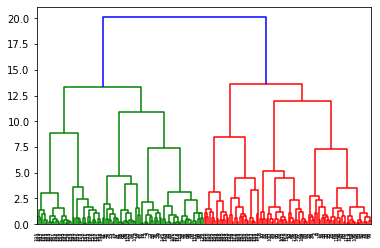

In [0]:
######### Dendogram ###################
import scipy.cluster.hierarchy as sch
Den=sch.dendrogram(sch.linkage(y=XScaled,method='ward'))

In [0]:
########## Apply Clustering ###################
from sklearn.cluster import AgglomerativeClustering
AC=AgglomerativeClustering(n_clusters=16)
ClusterLabels=AC.fit_predict(XScaled)
ClusterLabels=ClusterLabels.reshape(-1,1)
import numpy as np
ClusteredCustomers=np.hstack((CustomerDetails,ClusterLabels))
np.savetxt("ClusteredCustomers.csv",ClusteredCustomers,delimiter=",",fmt='%.6g')